In [1]:
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
data = pd.read_csv(r'..\Data\allData.csv')

In [3]:
data.shape

(6625, 25)

In [4]:
data.columns

Index(['number', 'position', 'Q1', 'Q2', 'Q3', 'positionText', 'points',
       'grid', 'laps', 'status', 'year', 'gpName', 'gpNumber', 'sessionName',
       'driverId', 'code', 'DriverNationality', 'constructorId',
       'constructorNationality', 'fastestLapNumber', 'fastestLapRank',
       'fastestLapAvgSpeed', 'fastestLapTime', 'totalTime', 'TimeInterval'],
      dtype='object')

In [5]:
df_race = data[data['sessionName'] == 'Race']

In [6]:
df_race

,number,position,Q1,Q2,Q3,positionText,points,grid,laps,status,...,code,DriverNationality,constructorId,constructorNationality,fastestLapNumber,fastestLapRank,fastestLapAvgSpeed,fastestLapTime,totalTime,TimeInterval
60,5,1.0,NaN,NaN,NaN,1,25.0,3.0,58.0,Finished,...,VET,German,ferrari,Italian,53.0,4.0,220.782,1:26.469,5373283.0,1:29:33.283
61,44,2.0,NaN,NaN,NaN,2,18.0,1.0,58.0,Finished,...,HAM,British,mercedes,German,50.0,3.0,220.845,1:26.444,5378319.0,+5.036
62,7,3.0,NaN,NaN,NaN,3,15.0,2.0,58.0,Finished,...,RAI,Finnish,ferrari,Italian,57.0,2.0,221.027,1:26.373,5379592.0,+6.309
63,3,4.0,NaN,NaN,NaN,4,12.0,8.0,58.0,Finished,...,RIC,Australian,red_bull,Austrian,54.0,1.0,222.128,1:25.945,5380352.0,+7.069
64,14,5.0,NaN,NaN,NaN,5,10.0,10.0,58.0,Finished,...,ALO,Spanish,mclaren,British,57.0,7.0,219.489,1:26.978,5401169.0,+27.886
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6620,11,15.0,NaN,NaN,NaN,15,0.0,4.0,55.0,Engine,...,PER,Mexican,red_bull,Austrian,51.0,2.0,219.993,1:26.419,NaN,NaN
6621,6,16.0,NaN,NaN,NaN,R,0.0,16.0,50.0,Accident,...,LAT,Canadian,williams,British,30.0,15.0,212.912,1:29.293,NaN,NaN
6622,99,17.0,NaN,NaN,NaN,R,0.0,14.0,33.0,Gearbox,...,GIO,Italian,alfa,Swiss,33.0,16.0,212.557,1:29.442,NaN,NaN
6623,63,18.0,NaN,NaN,NaN,R,0.0,17.0,26.0,Gearbox,...,RUS,British,williams,British,23.0,19.0,209.732,1:30.647,NaN,NaN


In [7]:
df_race.describe()

,number,position,points,grid,laps,year,gpNumber,fastestLapNumber,fastestLapRank,fastestLapAvgSpeed,totalTime
count,1619.000000,1599.000000,1599.000000,1599.000000,1599.000000,1619.000000,1619.000000,1526.000000,1526.000000,1526.000000,7.840000e+02
mean,28.008647,10.494059,5.065979,10.151345,54.482802,2019.492897,10.709080,46.992136,10.185452,210.311455,5.668426e+06
std,25.666323,5.764989,7.217079,5.819209,17.902728,1.145386,5.981119,15.200990,5.613831,19.500750,1.275282e+06
min,2.000000,1.000000,0.000000,0.000000,0.000000,2018.000000,1.000000,2.000000,1.000000,140.802000,2.070710e+05
25%,8.000000,5.500000,0.000000,5.000000,52.000000,2018.000000,6.000000,40.000000,5.000000,200.244500,5.280748e+06
50%,18.000000,10.000000,1.000000,10.000000,56.000000,2019.000000,11.000000,49.000000,10.000000,209.825500,5.591682e+06
75%,44.000000,15.000000,8.000000,15.000000,67.000000,2021.000000,16.000000,57.000000,15.000000,224.209000,5.884478e+06
max,99.000000,20.000000,27.000000,20.000000,87.000000,2021.000000,22.000000,85.000000,20.000000,255.014000,1.081032e+07


In [8]:
df_race.isna().sum()

number                       0
position                    20
Q1                        1619
Q2                        1619
Q3                        1619
positionText                20
points                      20
grid                        20
laps                        20
status                      20
year                         0
gpName                       0
gpNumber                     0
sessionName                  0
driverId                    20
code                         0
DriverNationality           20
constructorId               20
constructorNationality      20
fastestLapNumber            93
fastestLapRank              93
fastestLapAvgSpeed          93
fastestLapTime              93
totalTime                  835
TimeInterval               835
dtype: int64

In [9]:
df_race = df_race.drop(['Q1','Q2','Q3'], axis=1)

In [10]:
df_race['totalTime'].describe()

count    7.840000e+02
mean     5.668426e+06
std      1.275282e+06
min      2.070710e+05
25%      5.280748e+06
50%      5.591682e+06
75%      5.884478e+06
max      1.081032e+07
Name: totalTime, dtype: float64

In [11]:
df_race['totalTime'] = df_race['totalTime'].fillna(df_race['totalTime'].max())

In [12]:
df_race = df_race.drop(['TimeInterval','code'], axis=1)

In [13]:
df_race = df_race.dropna()

In [14]:
fastest  = []
for i in df_race['fastestLapTime']:
    if i != '192.074':
        a = list(map(float,i.split(':')))
        b = int((a[0]*60 + a[1])*1000)
    else : 
        b = 92074
    fastest.append(b)
df_race['fastestLapTime'] = fastest

In [15]:
df_race.head()

,number,position,positionText,points,grid,laps,status,year,gpName,gpNumber,sessionName,driverId,DriverNationality,constructorId,constructorNationality,fastestLapNumber,fastestLapRank,fastestLapAvgSpeed,fastestLapTime,totalTime
60,5,1.0,1,25.0,3.0,58.0,Finished,2018,Australian Grand Prix,1,Race,vettel,German,ferrari,Italian,53.0,4.0,220.782,86469,5373283.0
61,44,2.0,2,18.0,1.0,58.0,Finished,2018,Australian Grand Prix,1,Race,hamilton,British,mercedes,German,50.0,3.0,220.845,86444,5378319.0
62,7,3.0,3,15.0,2.0,58.0,Finished,2018,Australian Grand Prix,1,Race,raikkonen,Finnish,ferrari,Italian,57.0,2.0,221.027,86373,5379592.0
63,3,4.0,4,12.0,8.0,58.0,Finished,2018,Australian Grand Prix,1,Race,ricciardo,Australian,red_bull,Austrian,54.0,1.0,222.128,85945,5380352.0
64,14,5.0,5,10.0,10.0,58.0,Finished,2018,Australian Grand Prix,1,Race,alonso,Spanish,mclaren,British,57.0,7.0,219.489,86978,5401169.0


In [16]:
df_race.isna().sum()

number                    0
position                  0
positionText              0
points                    0
grid                      0
laps                      0
status                    0
year                      0
gpName                    0
gpNumber                  0
sessionName               0
driverId                  0
DriverNationality         0
constructorId             0
constructorNationality    0
fastestLapNumber          0
fastestLapRank            0
fastestLapAvgSpeed        0
fastestLapTime            0
totalTime                 0
dtype: int64

In [17]:
df_race.columns

Index(['number', 'position', 'positionText', 'points', 'grid', 'laps',
       'status', 'year', 'gpName', 'gpNumber', 'sessionName', 'driverId',
       'DriverNationality', 'constructorId', 'constructorNationality',
       'fastestLapNumber', 'fastestLapRank', 'fastestLapAvgSpeed',
       'fastestLapTime', 'totalTime'],
      dtype='object')

In [18]:
from sklearn.ensemble import RandomForestRegressor
random_forest = RandomForestRegressor() 

In [19]:
col = [ 'positionText',
       'status', 'year', 'gpName', 'gpNumber', 'sessionName', 'driverId', 'DriverNationality', 'constructorId', 'constructorNationality']
for elmt in col:
    df_race[col] = df_race[col].astype("category")

In [20]:
df_features = pd.get_dummies(df_race, columns = ['positionText',
       'status', 'year', 'gpName', 'gpNumber', 'sessionName', 'driverId',
       'DriverNationality', 'constructorId', 'constructorNationality'])

In [21]:
df_features.columns

Index(['number', 'position', 'points', 'grid', 'laps', 'fastestLapNumber',
       'fastestLapRank', 'fastestLapAvgSpeed', 'fastestLapTime', 'totalTime',
       ...
       'constructorId_toro_rosso', 'constructorId_williams',
       'constructorNationality_American', 'constructorNationality_Austrian',
       'constructorNationality_British', 'constructorNationality_French',
       'constructorNationality_German', 'constructorNationality_Indian',
       'constructorNationality_Italian', 'constructorNationality_Swiss'],
      dtype='object', length=208)

In [22]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df_features, test_size=0.2)
X_train = train.drop(['position'], axis=1)
y_train = train['position']
X_test = test.drop(['position'], axis=1)
y_test = test['position']

In [23]:
model_rd = random_forest.fit(X_train, y_train)

In [24]:
model_rd.score(X_test,y_test)

0.9850139896362525

In [25]:
y_pred = random_forest.predict(X_test) 

In [26]:
erreurs = abs(y_pred - y_test)
print('Mean Absolute Error:', round(np.mean(erreurs), 2))
mape = 100 * (erreurs / y_test)
print('Mean Absolute Percentage Error :', round(np.mean(mape), 2), '%.')

Mean Absolute Error: 0.16
Mean Absolute Percentage Error : 0.94 %.


Text(0.5, 0, 'Relative Importance')

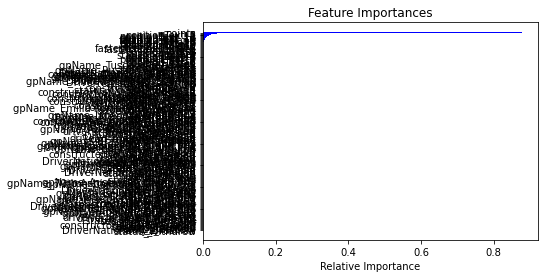

In [27]:
importances = model_rd.feature_importances_
indices = np.argsort(importances)
# style du graphique 
plt.figure(1)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [X_test.columns[i] for i in indices])
plt.xlabel('Relative Importance')

In [28]:
# example of training a final regression model
from sklearn.linear_model import LinearRegression


model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

erreurs = abs(y_pred - y_test)
print('Mean Absolute Error:', round(np.mean(erreurs), 2))
mape = 100 * (erreurs / y_test)
print('Mean Absolute Percentage Error :', round(np.mean(mape), 2), '%.')

Mean Absolute Error: 0.26
Mean Absolute Percentage Error : 3.11 %.
